## IMPORT LIBS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## READ DATASET

In [11]:
df=pd.read_csv("C:/Users/irems/OneDrive/Masaüstü/rohlik-orders-forecasting-challenge/train.csv")

## HEAD

In [12]:
df.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


## TAIL

In [13]:
df.tail()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13
7339,Budapest_1,2024-03-14,8130.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2953.0,27231.0,Budapest_1_2024-03-14


## SANITY CHECK

In [14]:
#SHAPE
df.shape

(7340, 18)

In [17]:
#INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   warehouse               7340 non-null   object 
 1   date                    7340 non-null   object 
 2   orders                  7340 non-null   float64
 3   holiday_name            218 non-null    object 
 4   holiday                 7340 non-null   int64  
 5   shutdown                7340 non-null   int64  
 6   mini_shutdown           7340 non-null   int64  
 7   shops_closed            7340 non-null   int64  
 8   winter_school_holidays  7340 non-null   int64  
 9   school_holidays         7340 non-null   int64  
 10  blackout                7340 non-null   int64  
 11  mov_change              7340 non-null   float64
 12  frankfurt_shutdown      7340 non-null   int64  
 13  precipitation           7070 non-null   float64
 14  snow                    7070 non-null   

In [20]:
#finding missing values
df.isnull().sum()

warehouse                    0
date                         0
orders                       0
holiday_name              7122
holiday                      0
shutdown                     0
mini_shutdown                0
shops_closed                 0
winter_school_holidays       0
school_holidays              0
blackout                     0
mov_change                   0
frankfurt_shutdown           0
precipitation              270
snow                       270
user_activity_1              0
user_activity_2              0
id                           0
dtype: int64

In [21]:
#finding duplicates
df.duplicated().sum()

0

In [22]:
#identifiyng garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64
******************************
date
2022-07-26    7
2022-10-31    7
2022-11-09    7
2022-11-08    7
2022-11-07    7
             ..
2024-01-01    4
2022-05-01    4
2020-12-26    4
2021-04-04    4
2023-08-20    4
Name: count, Length: 1193, dtype: int64
******************************
holiday_name
International womens day                                       26
Christmas Eve                                                  23
New Years Day                                                  16
2nd Christmas Day                                              16
Cyrila a Metodej                                               12
Den vzniku samostatneho ceskoslovenskeho statu                 12
Den ceske statnosti                                            12
Jan Hus                                                        12


## Exploratory Data Analysis EDA

In [24]:
#descriptive statistics
df.describe()

,orders,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2
count,7340.000000,7340.000000,7340.000000,7340.000000,7340.000000,7340.000000,7340.000000,7340.000000,7340.000000,7340.000000,7070.000000,7070.000000,7340.000000,7340.000000
mean,5535.443869,0.027248,0.000136,0.000545,0.010899,0.029973,0.007084,0.000954,0.221499,0.000272,1.621126,0.290112,1633.545777,23477.031335
std,2182.680279,0.162816,0.011672,0.023340,0.103836,0.170524,0.083876,0.030869,0.410293,0.016506,4.542875,1.546102,784.167637,8934.848328
min,790.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,482.000000,1797.000000
25%,4434.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,945.000000,18509.000000
50%,5370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1349.000000,22267.000000
75%,7009.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2308.000000,30028.750000
max,18139.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,19.840000,3437.000000,45769.000000


In [25]:
df.describe(include="object")

,warehouse,date,holiday_name,id
count,7340,7340,218,7340
unique,7,1193,24,7340
top,Prague_1,2022-07-26,International womens day,Prague_1_2020-12-05
freq,1193,7,26,1


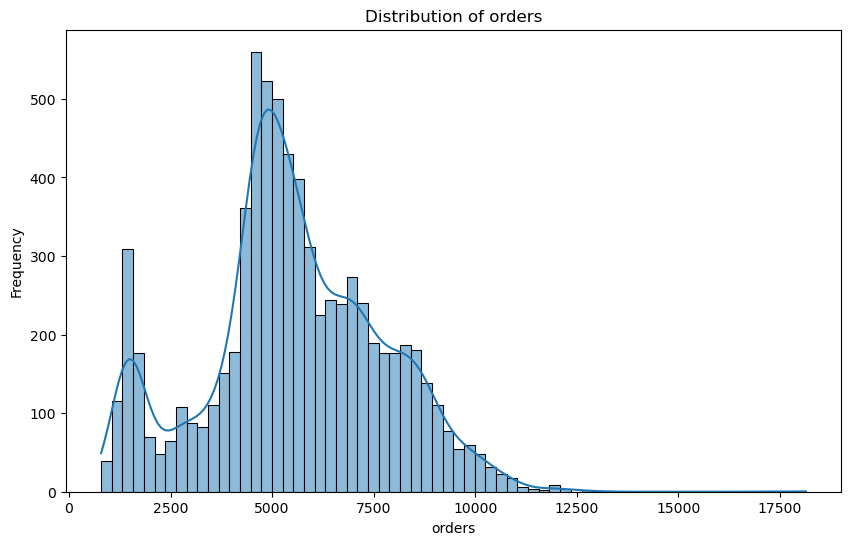

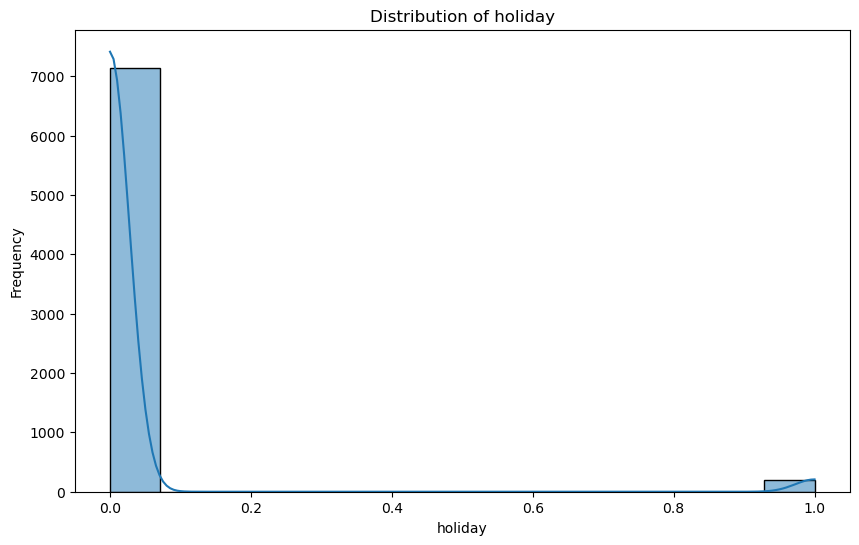

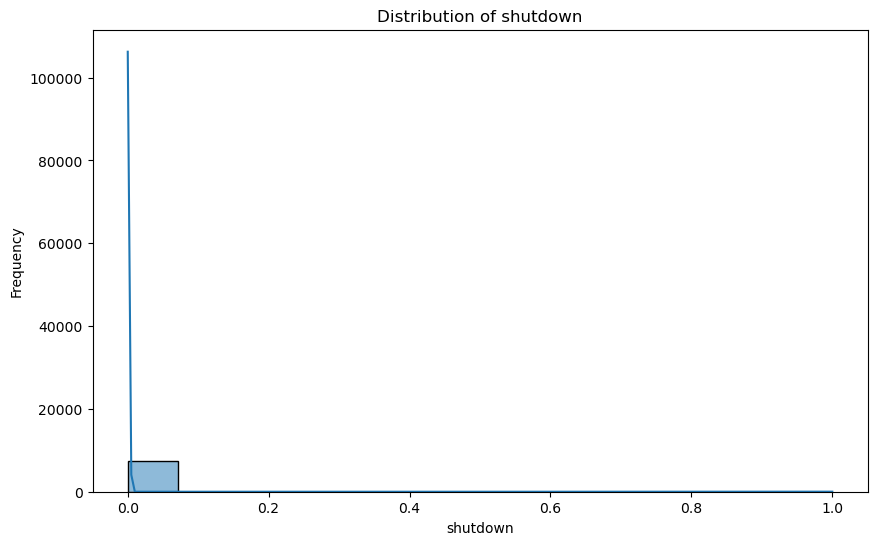

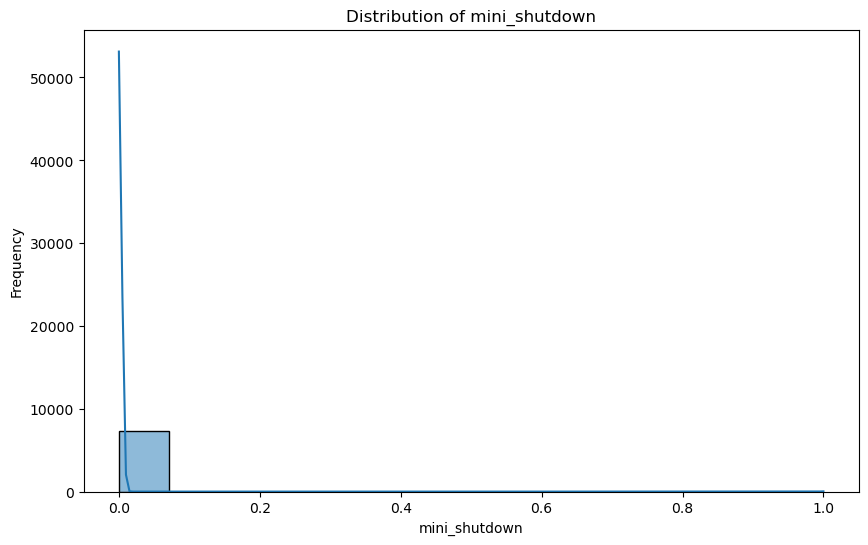

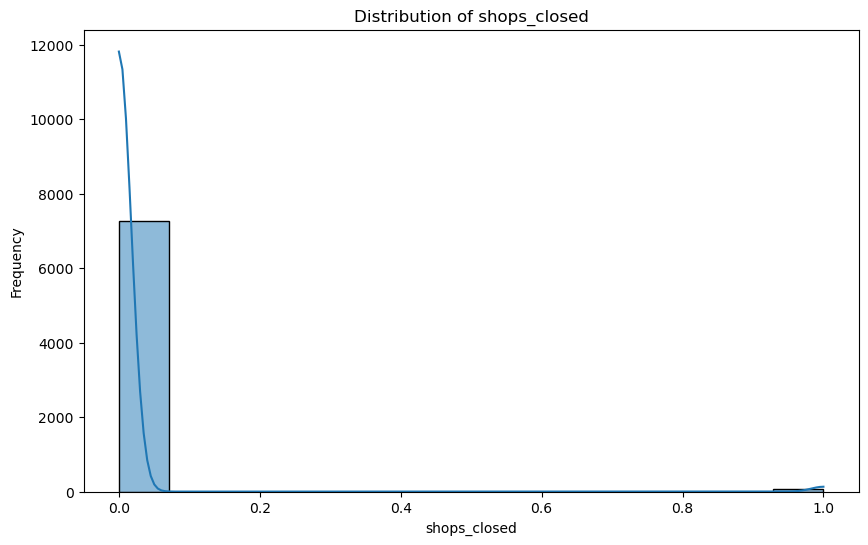

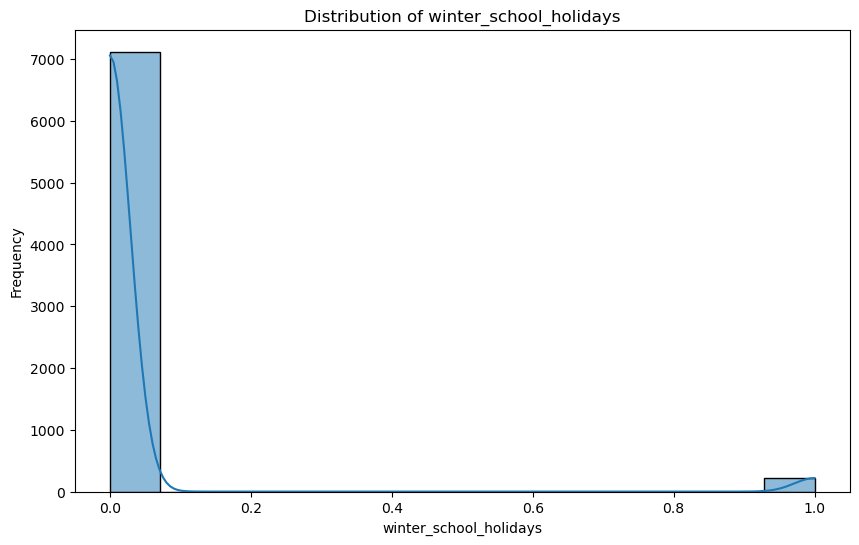

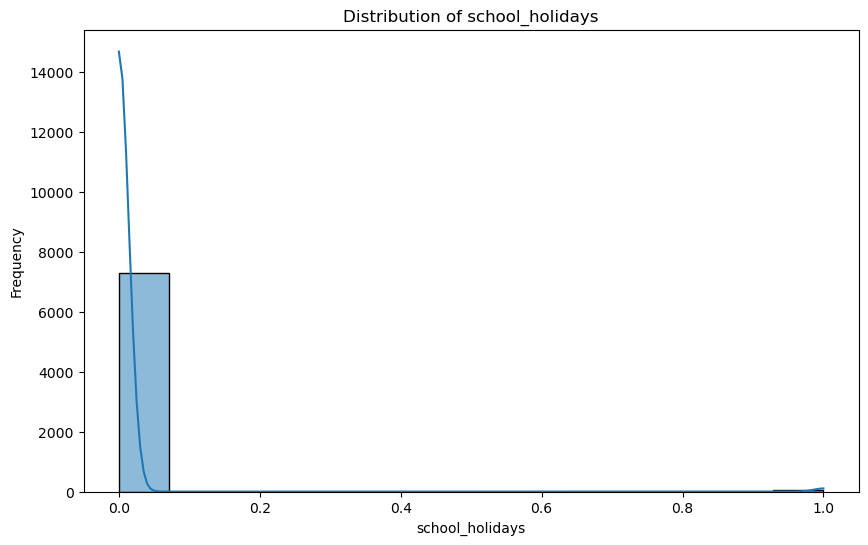

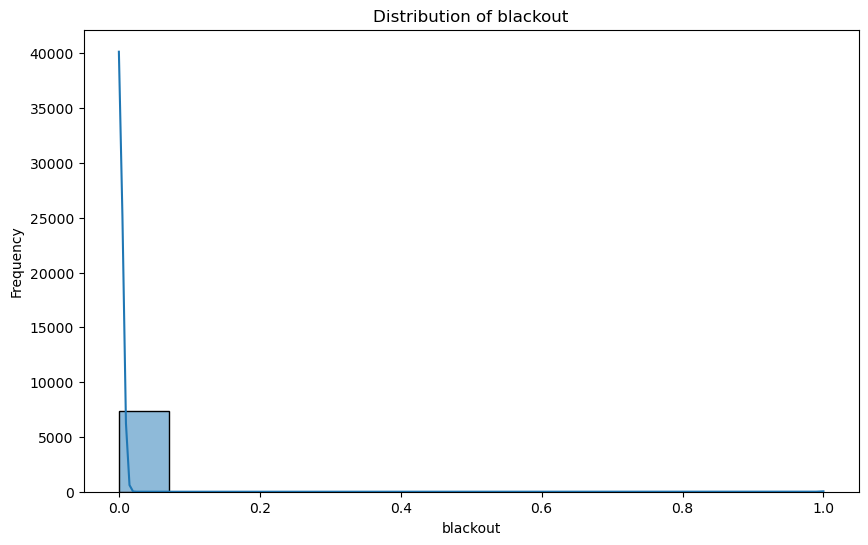

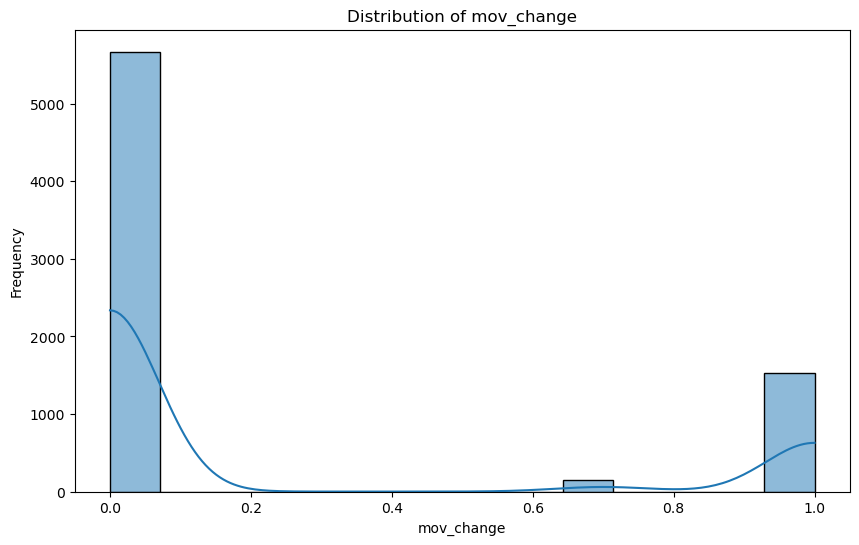

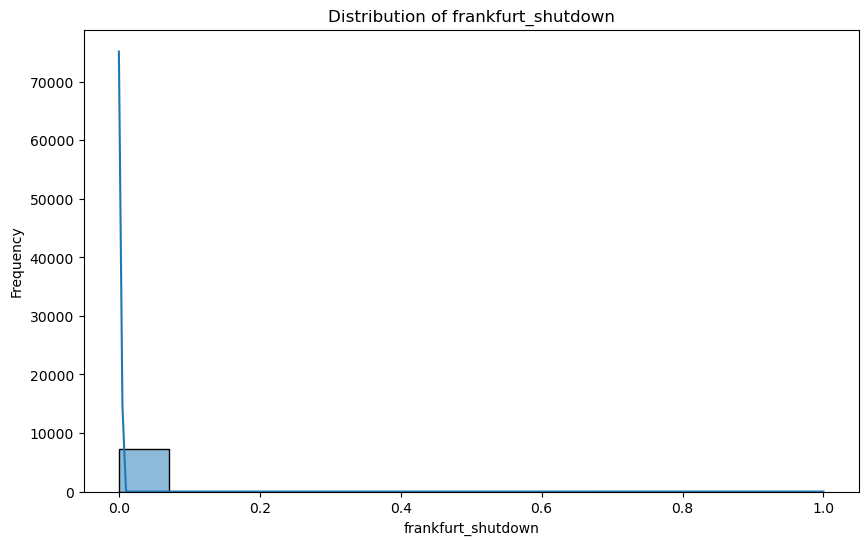

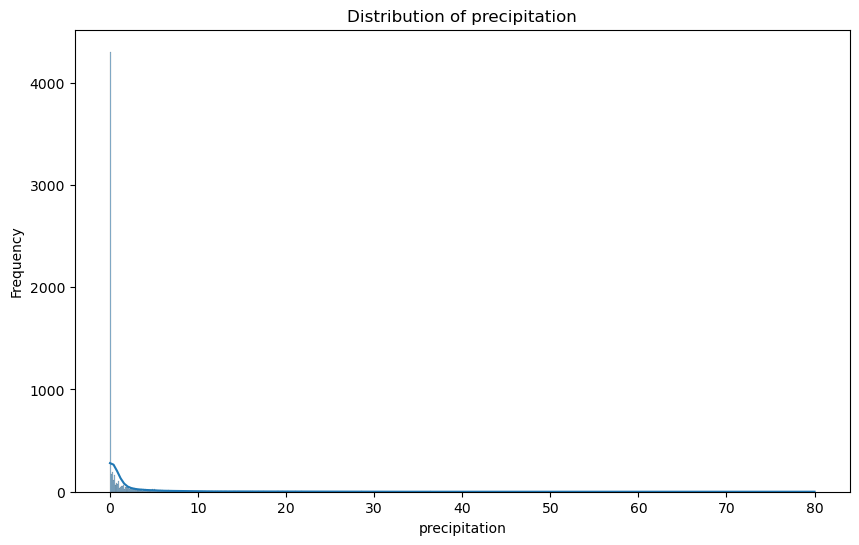

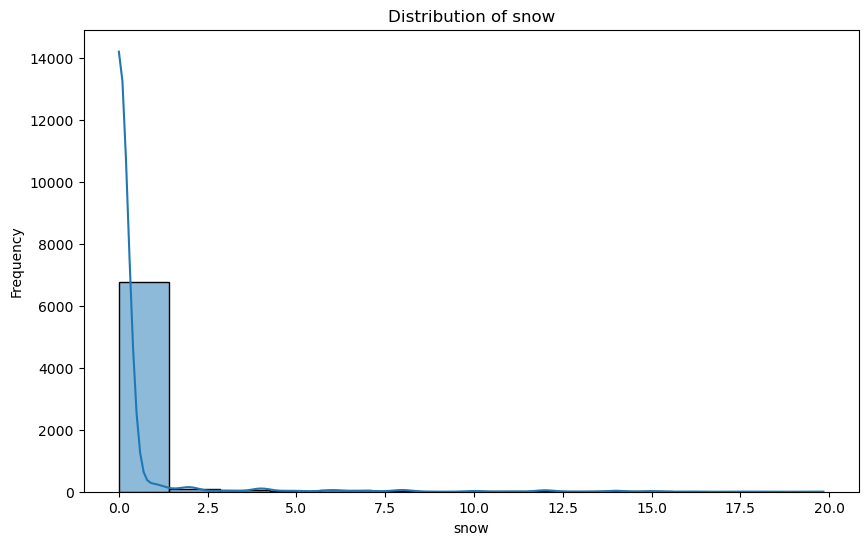

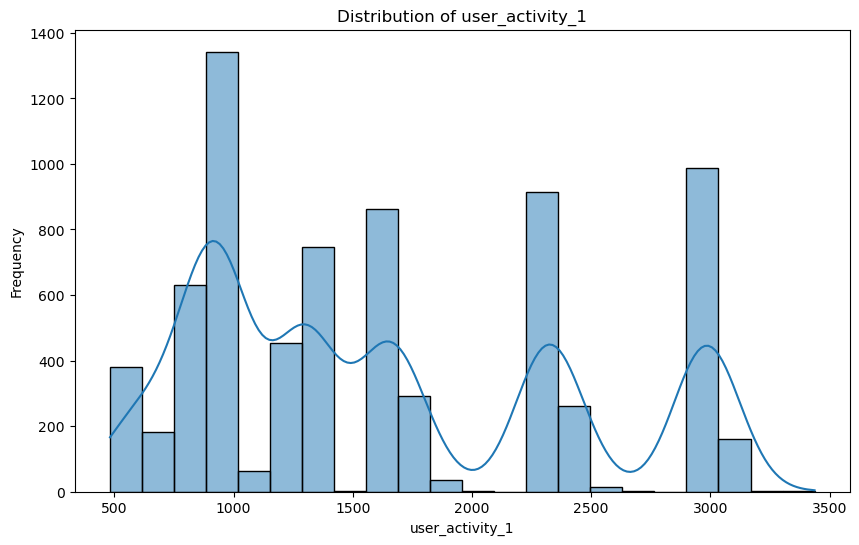

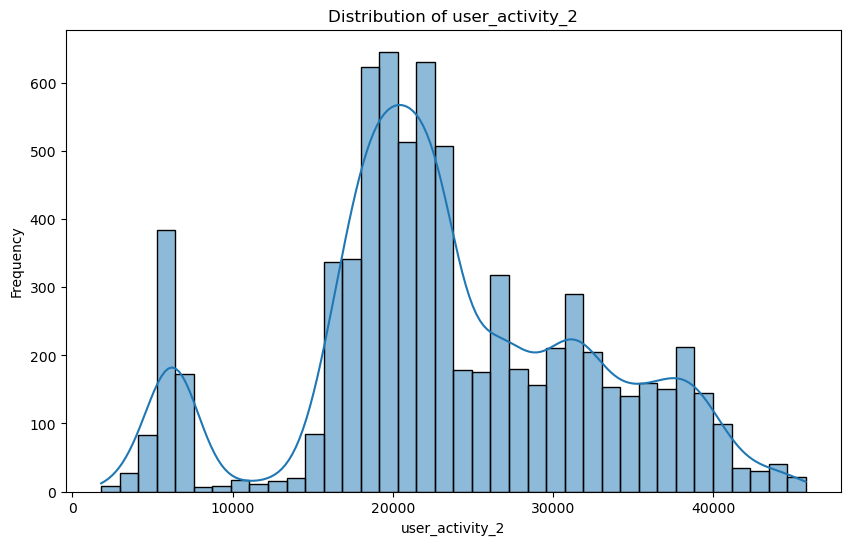

In [27]:
#histogram to understand distrubition
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

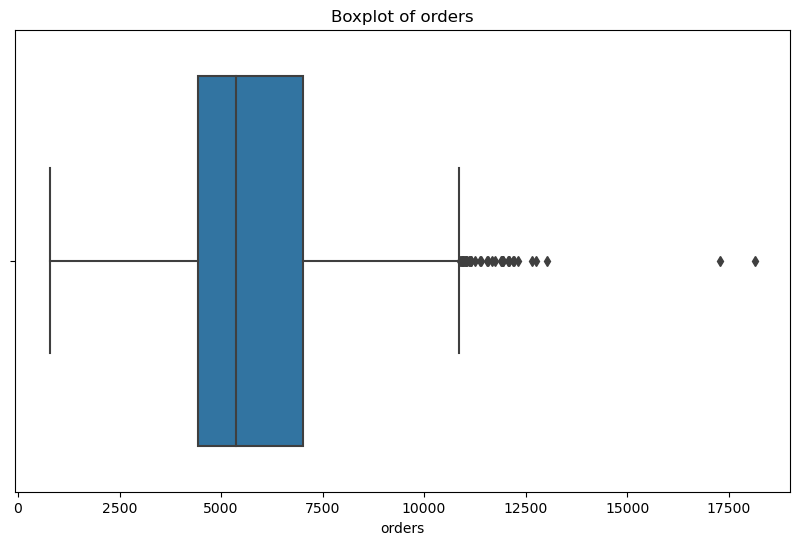

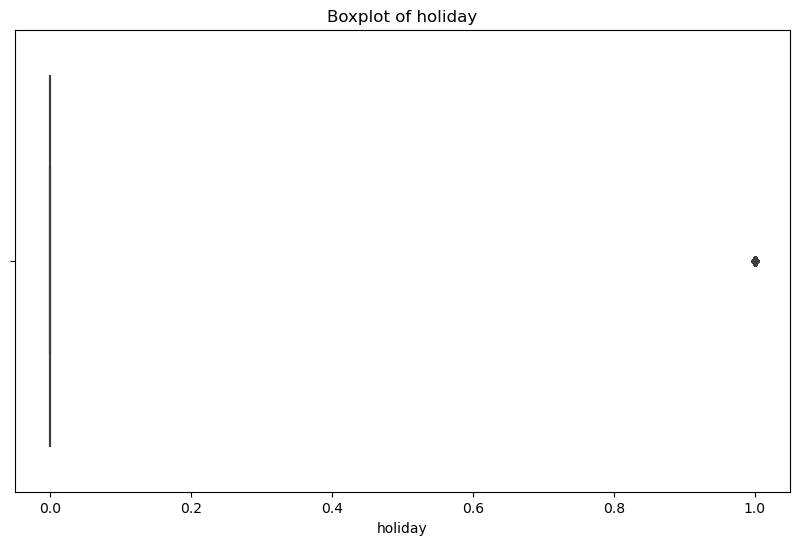

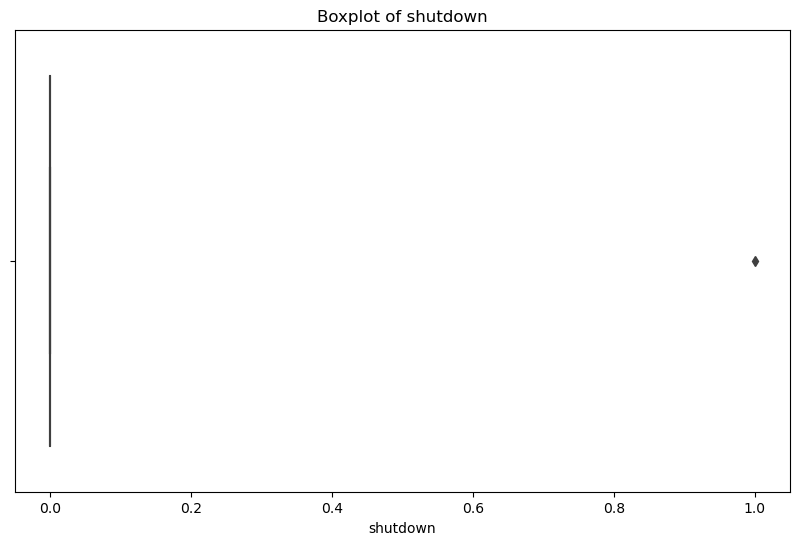

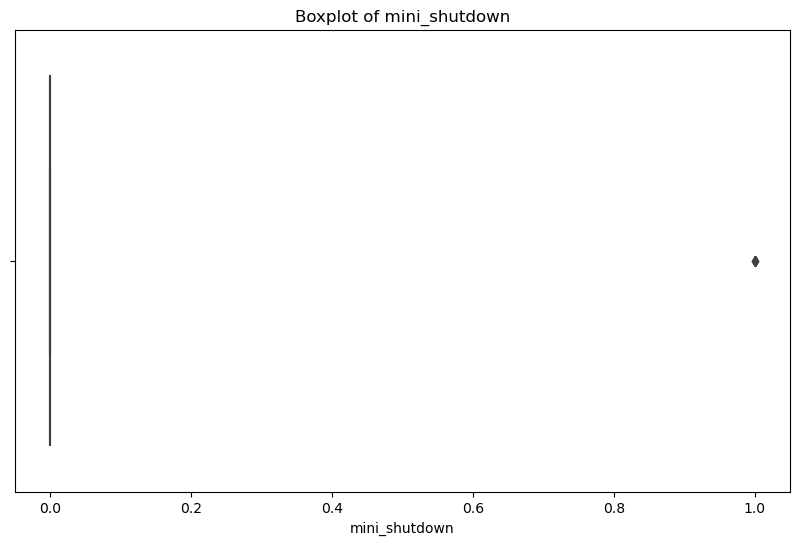

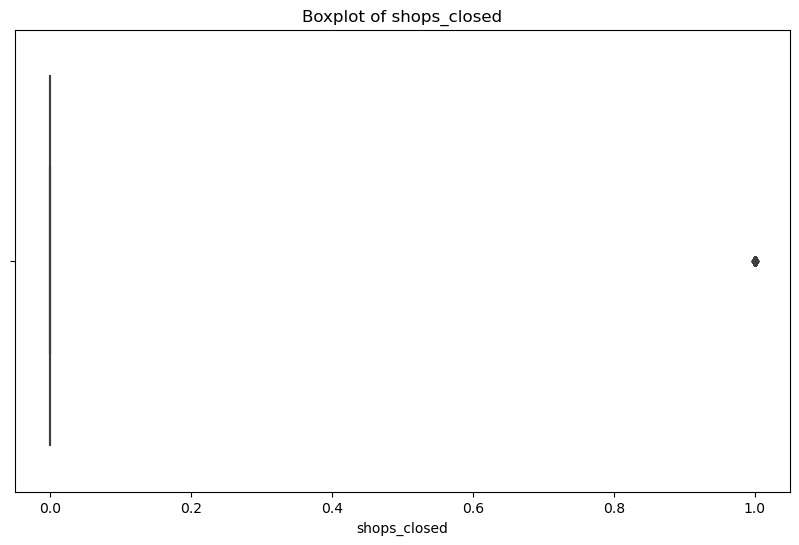

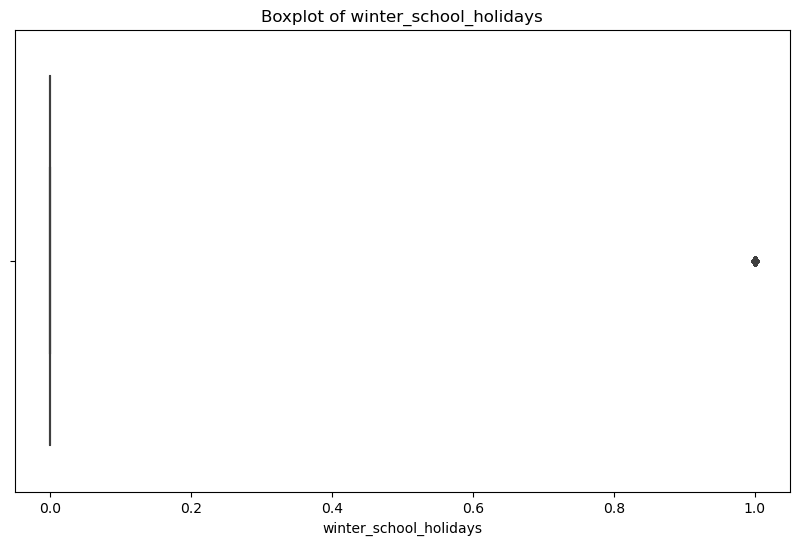

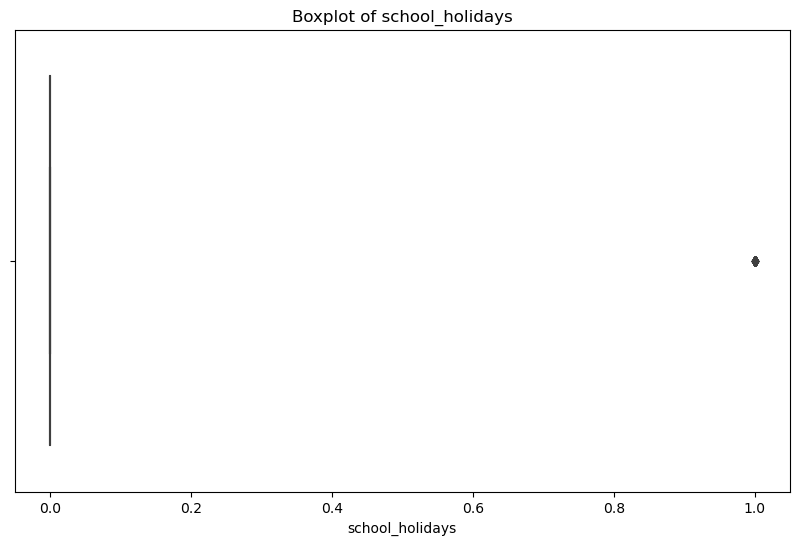

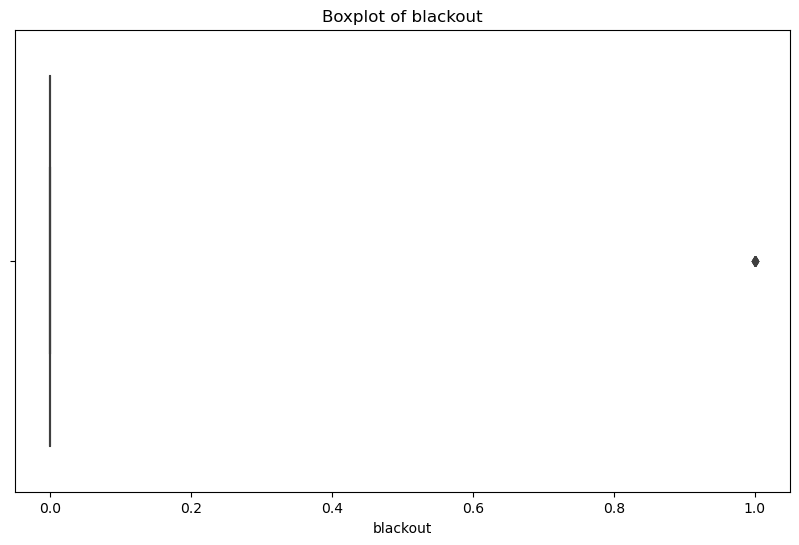

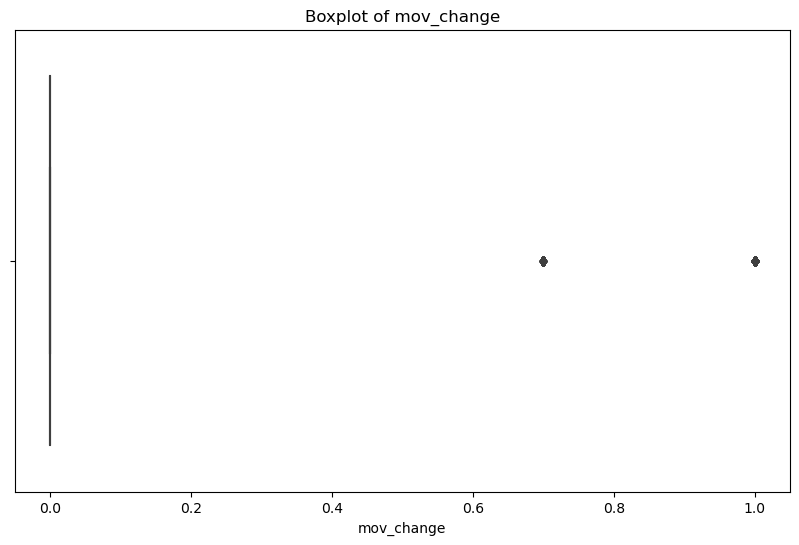

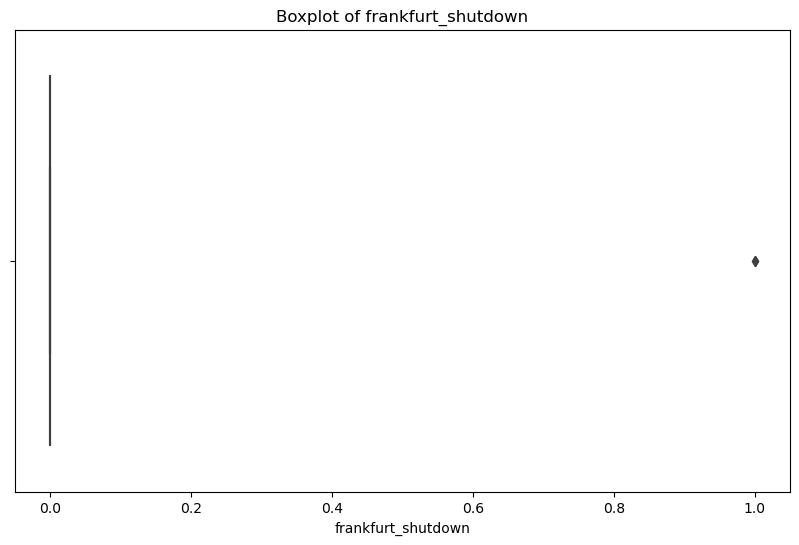

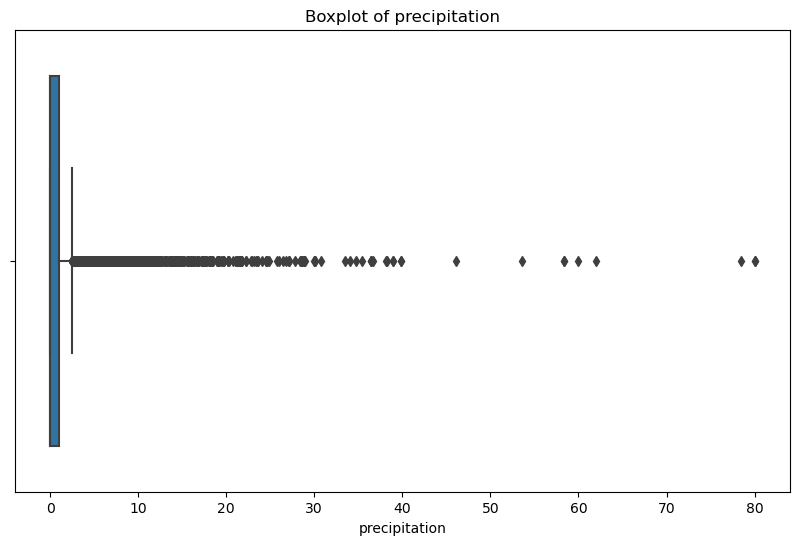

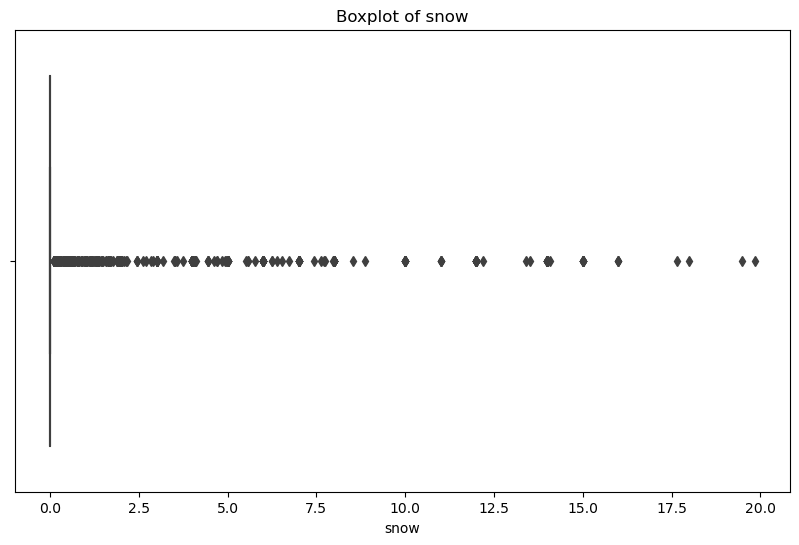

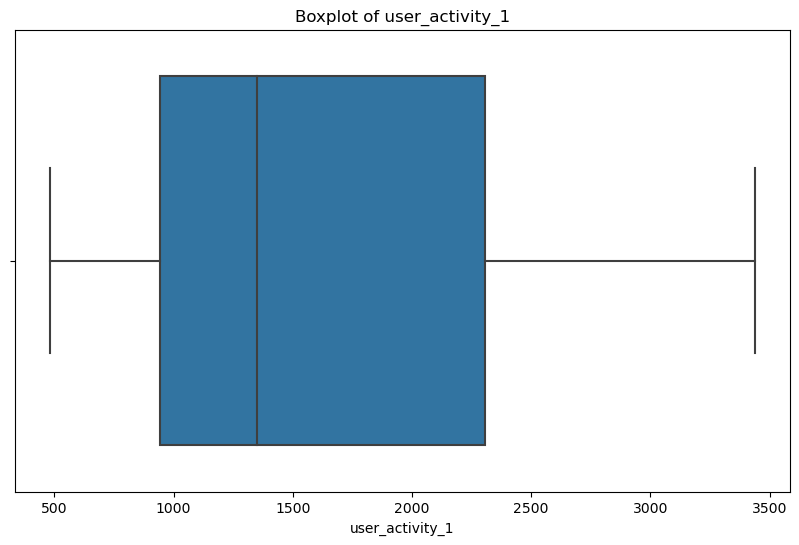

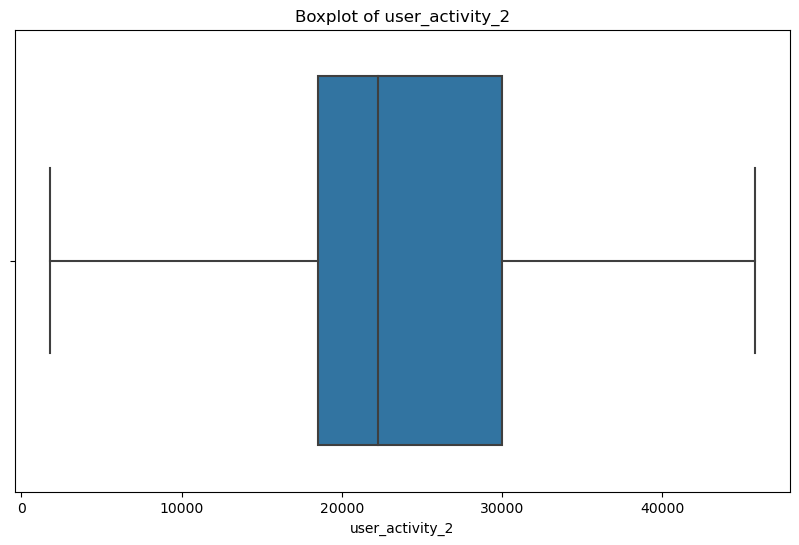

In [29]:
#Boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=i)
    plt.title(f"Boxplot of {i}")
    plt.xlabel(i)
    plt.show()

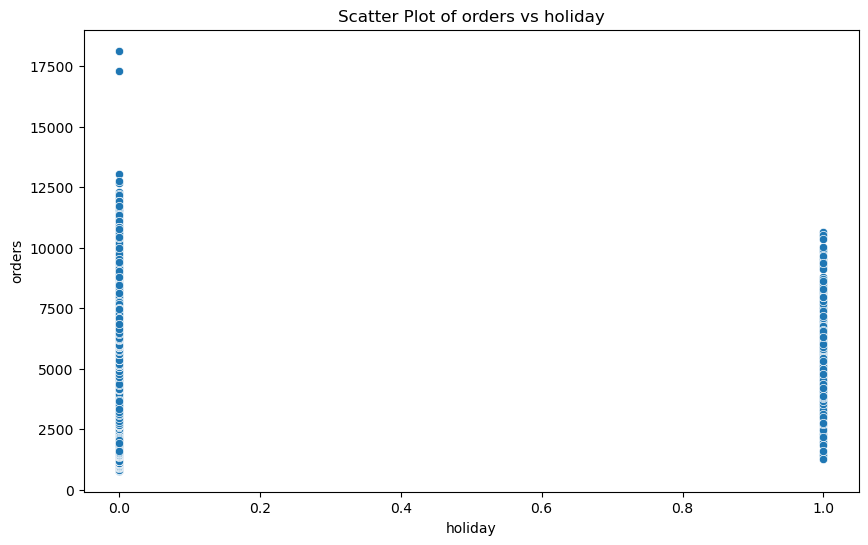

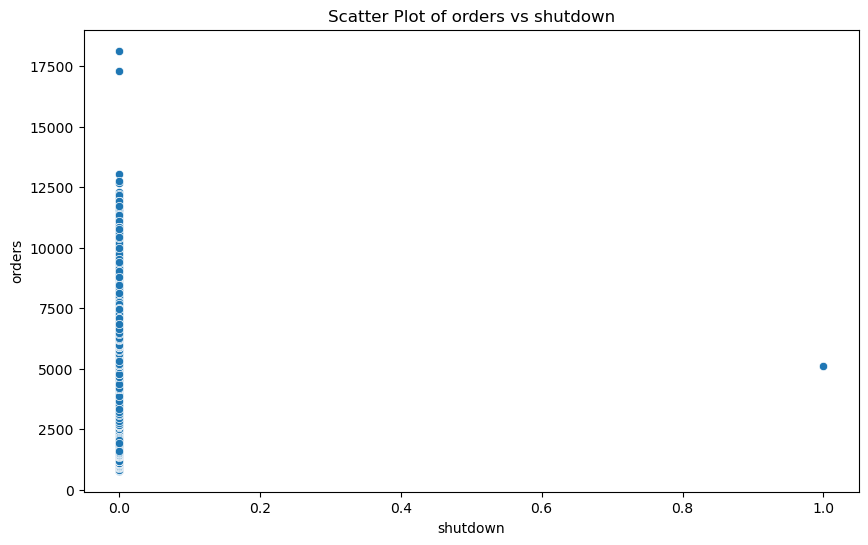

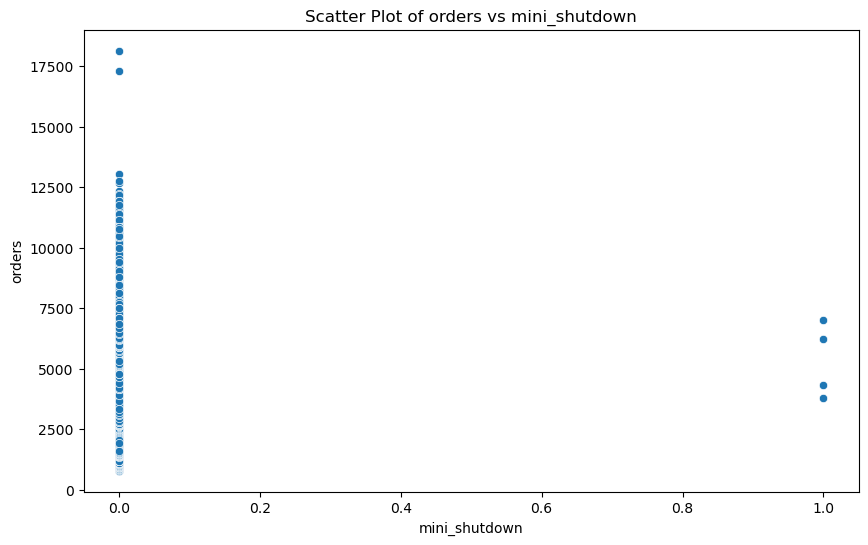

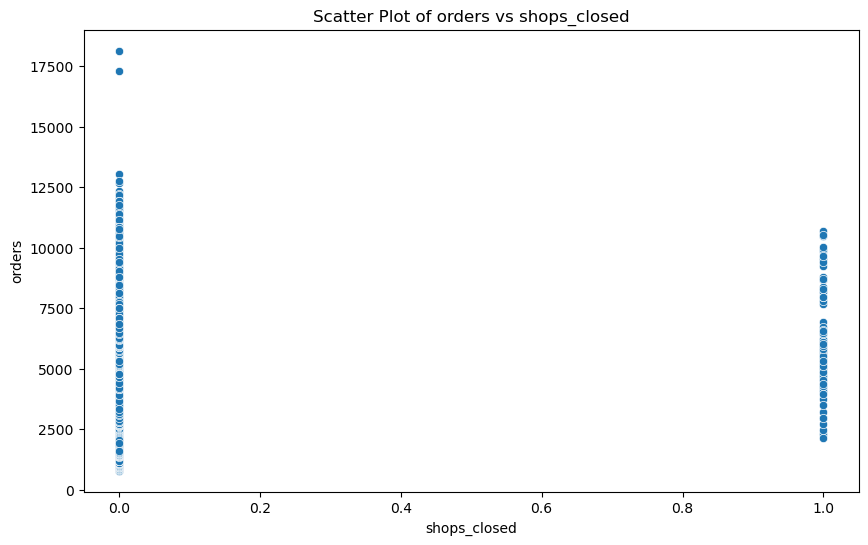

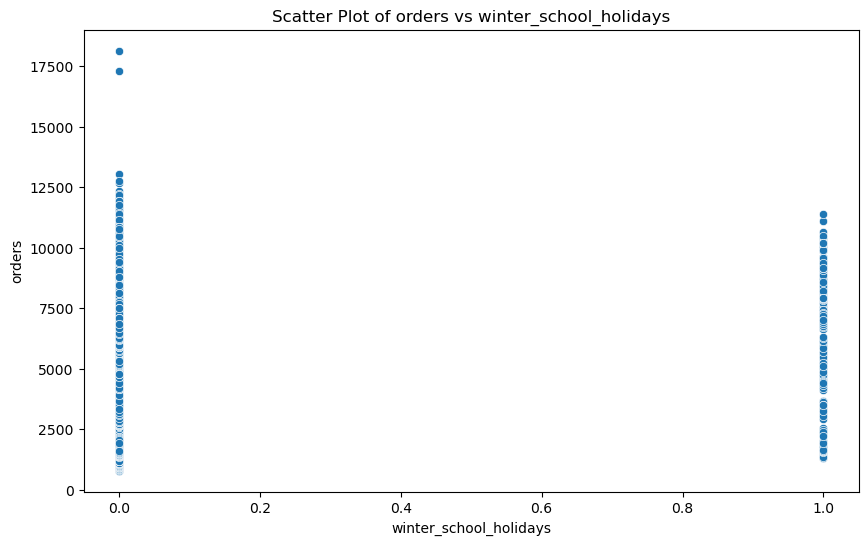

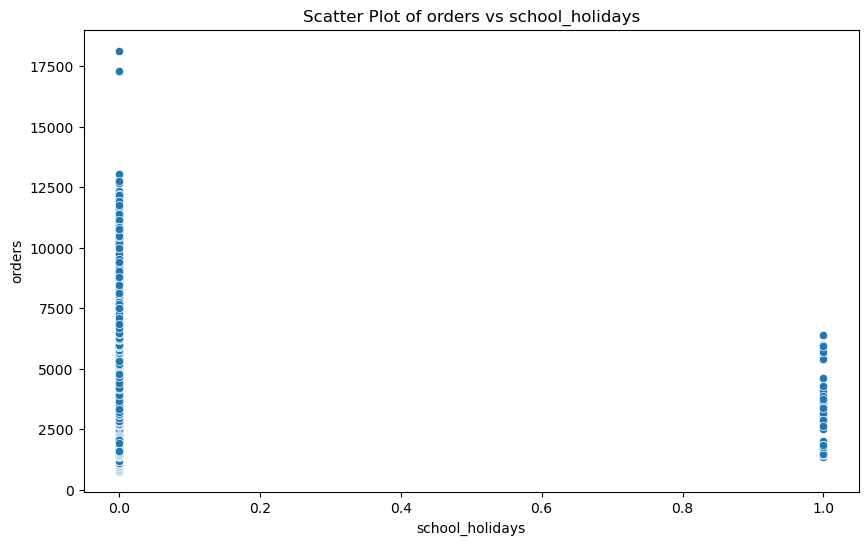

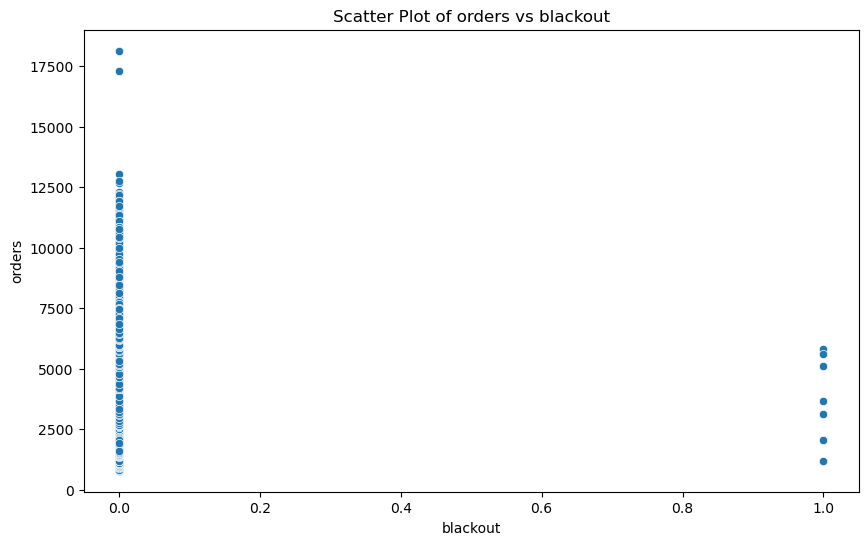

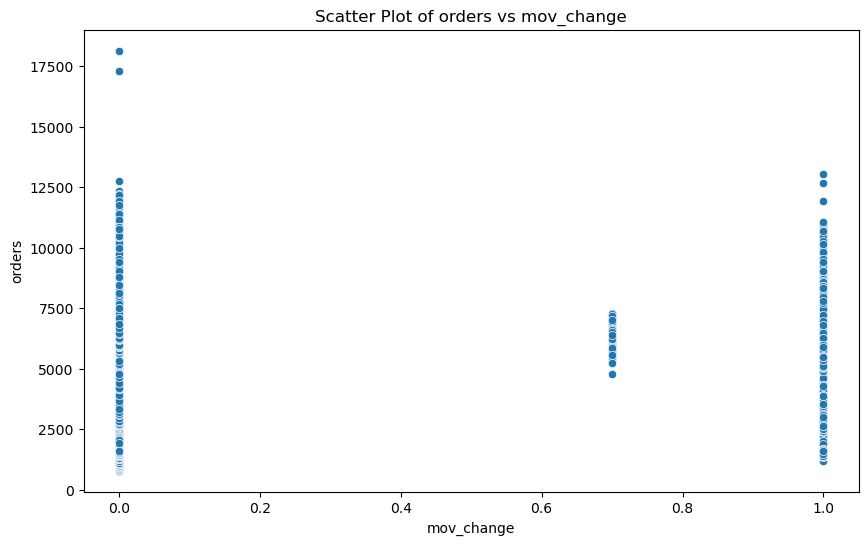

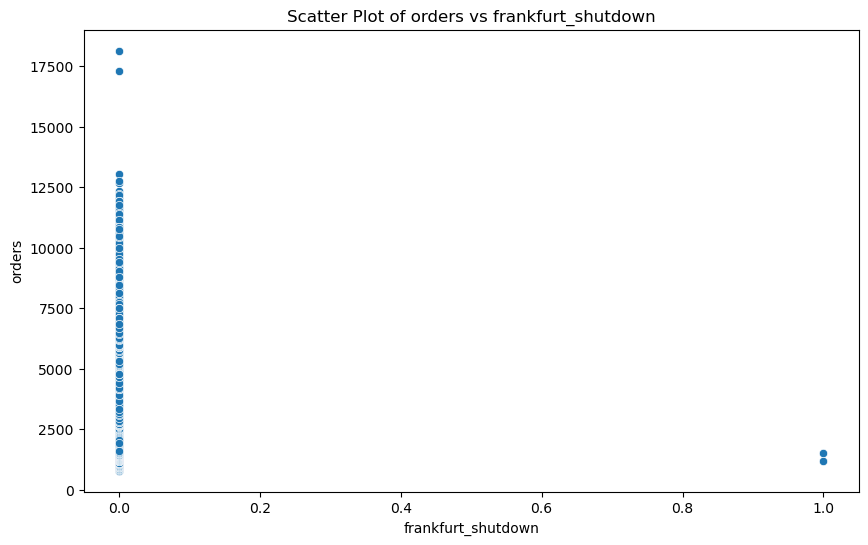

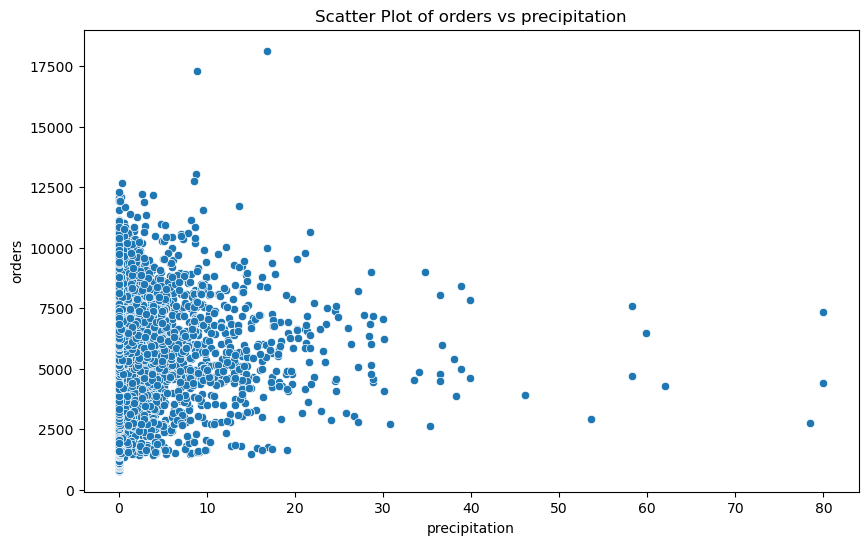

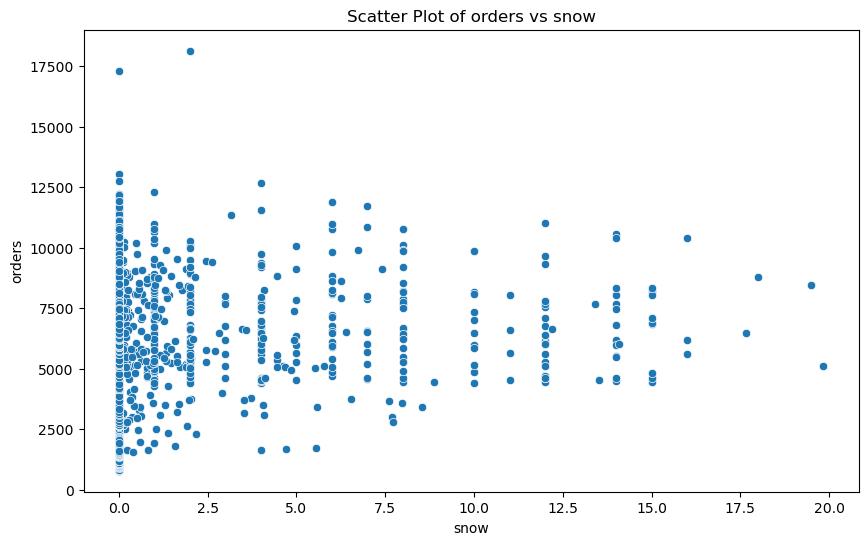

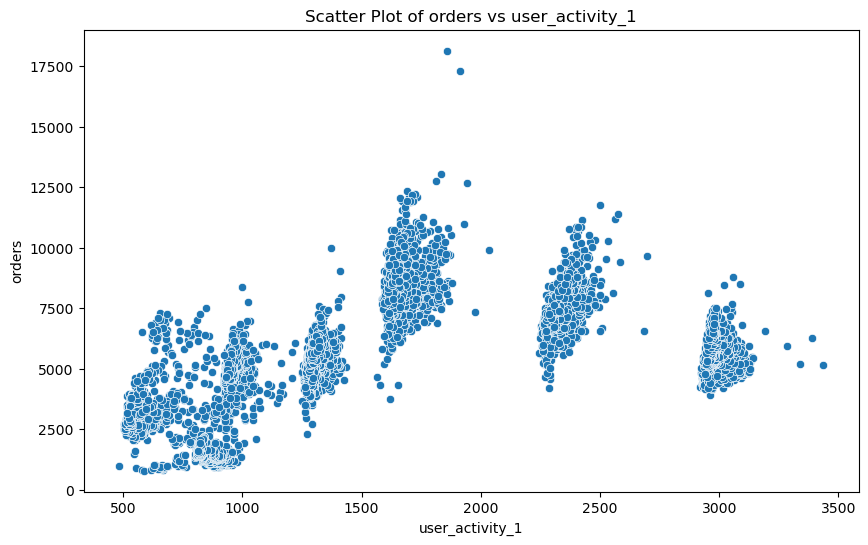

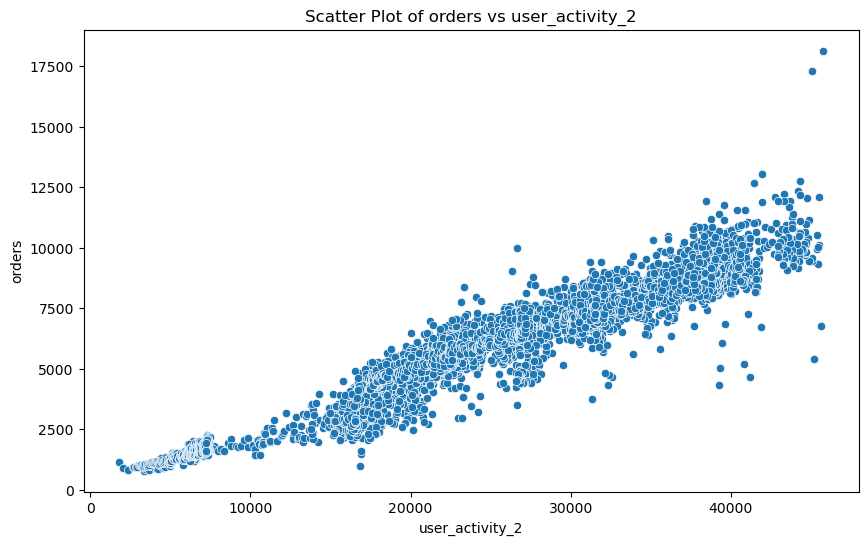

In [34]:
#scatter plot to check the relationship with order
for i in ['holiday', 'shutdown', 'mini_shutdown', 'shops_closed',
          'winter_school_holidays', 'school_holidays', 'blackout', 'mov_change',
          'frankfurt_shutdown', 'precipitation', 'snow', 'user_activity_1',
          'user_activity_2']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=i, y='orders')
    plt.title(f'Scatter Plot of orders vs {i}')
    plt.xlabel(i)
    plt.ylabel('orders')
    plt.show()

In [31]:
df.select_dtypes(include="number").columns

Index(['orders', 'holiday', 'shutdown', 'mini_shutdown', 'shops_closed',
       'winter_school_holidays', 'school_holidays', 'blackout', 'mov_change',
       'frankfurt_shutdown', 'precipitation', 'snow', 'user_activity_1',
       'user_activity_2'],
      dtype='object')

## MISSING VALUE TREATMENT

In [ ]:
## choose the method for imputing the missing value
# mean,median,mode or KNNIputer

In [36]:
for i in ["snow","precipitation"]:
    df[i].fillna(df[i].median(),inplace=True)

In [39]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [41]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform((df[[i]]))

In [43]:
df.isnull().sum()

warehouse                    0
date                         0
orders                       0
holiday_name              7122
holiday                      0
shutdown                     0
mini_shutdown                0
shops_closed                 0
winter_school_holidays       0
school_holidays              0
blackout                     0
mov_change                   0
frankfurt_shutdown           0
precipitation                0
snow                         0
user_activity_1              0
user_activity_2              0
id                           0
dtype: int64

## Outlier Treatments

In [50]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [47]:
wisker(df['orders'])

(571.125, 10872.125)

In [52]:
for i in ['user_activity_1', 'user_activity_2']:
    lw, uw = whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

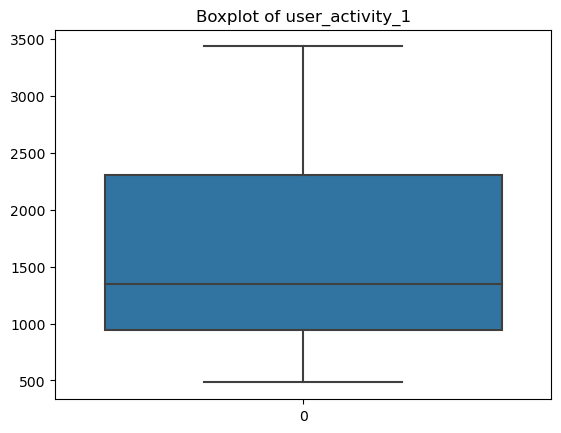

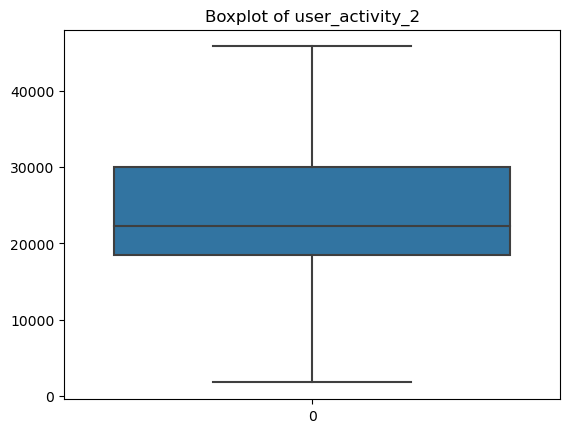

In [56]:
for i in ['user_activity_1', 'user_activity_2']:
    sns.boxplot(data=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [46]:
df.columns

Index(['warehouse', 'date', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id'],
      dtype='object')

## Encoding of Data

In [ ]:
# one hot encoding

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [67]:
ohetransform=ohe.fit_transform(df[['warehouse']])

In [68]:
ohetransform

,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
7335,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7336,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7337,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7338,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_copy=df.copy()
df.head()


,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,...,user_activity_1,user_activity_2,id,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,2020-12-05,0.351893,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.419628,0.699945,Prague_1_2020-12-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020-12-06,0.333967,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.408122,0.698399,Prague_1_2020-12-06,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020-12-07,0.359675,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410829,0.699422,Prague_1_2020-12-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2020-12-08,0.332008,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.405753,0.696489,Prague_1_2020-12-08,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-12-09,0.352758,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413536,0.696193,Prague_1_2020-12-09,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Data Normalization

In [81]:
# Min max scaling

In [102]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [103]:
numeric_columns = df.select_dtypes(include='number').columns.drop(['orders'])
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [104]:
df.head()

,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,...,user_activity_1,user_activity_2,id,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,2020-12-05,0.351893,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.419628,0.699945,Prague_1_2020-12-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020-12-06,0.333967,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.408122,0.698399,Prague_1_2020-12-06,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020-12-07,0.359675,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410829,0.699422,Prague_1_2020-12-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2020-12-08,0.332008,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.405753,0.696489,Prague_1_2020-12-08,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-12-09,0.352758,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413536,0.696193,Prague_1_2020-12-09,0.0,0.0,0.0,0.0,1.0,0.0,0.0
